In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

## Create sample data ## 

In [110]:

centers = [[1, 2], [-1, -1], [1, -1], [-3, 2], [-5, -3]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.9)

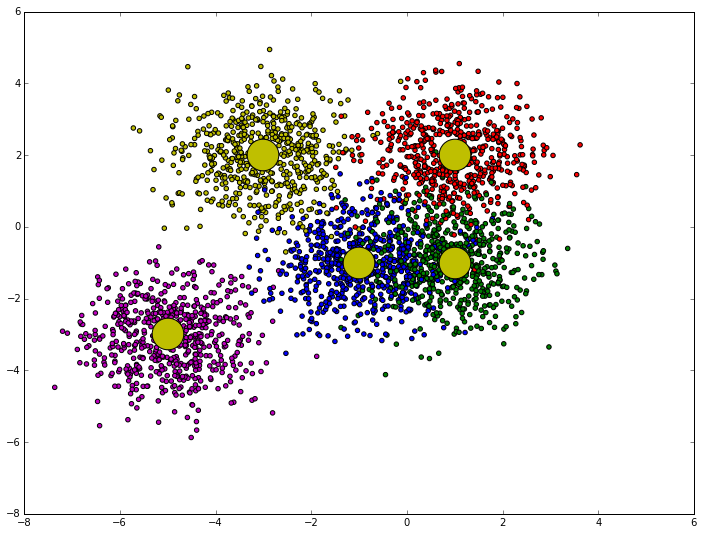

In [132]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

colors = ['r','b','g','y','m']
#colors = [np.random.rand(3,) for i in range(n_clusters)]
colors_list = [colors[label] for label in labels_true]

plt.scatter(X[:,0], X[:,1], c=colors_list)
# b: blue g: green r: red c: cyan m: magenta y: yellow k: black w: white
plt.scatter([c[0] for c in centers], [c[1] for c in centers], s=1000, c='y')
plt.show()

In [133]:
## Run K Means Algorithm ##

In [134]:
class KMeans():
    def __init__(X, n_means=5):
        self.X = X
        self.mu = [(np.random.uniform(-6,6),np.random.uniform(-6,6)) for i in xrange(n_means)]
    def cluster_points():
        self.clusters  = {}
        for x in self.X:
            bestmukey = min([(i[0], np.linalg.norm(x-self.mu[i[0]])) \
                        for i in enumerate(self.mu)], key=lambda t:t[1])[0]
            try:
                self.clusters[bestmukey].append(x)
            except KeyError:
                self.clusters[bestmukey] = [x]
        return 


    def reevaluate_centers():
        newmu = []
        keys = sorted(self.clusters.keys())
        for k in keys:
            newmu.append(np.mean(self.clusters[k], axis = 0))
        return newmu


    def has_converged(mu, oldmu):
        return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))


    def find_centers(X, K):
        # Initialize to K random centers
        oldmu = random.sample(X, K)
        mu = random.sample(X, K)
        while not has_converged(mu, oldmu):
            oldmu = mu
            # Assign all points in X to clusters
            clusters = cluster_points(X, mu)
            # Reevaluate centers
            mu = reevaluate_centers(oldmu, clusters)
        return(mu, clusters)